In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

In [2]:
path = r"C:\Users\Jamil\Desktop\Untitled Folder\New folder/cleaned_merged_datasets.csv"
df  = pd.read_csv(path)
df.head(10).T

C:\Users\Jamil\AppData\Local\Temp\ipykernel_2832\2186388098.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv(path)


,0,1,2,3,4,5,6,7,8,9
area,1185.0,2464.0,1140.0,1920.0,1445.0,925.0,2468.0,1475.0,1066.0,950.0
building_type,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment
building_nature,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential
image_url,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/15...,https://images-cdn.bproperty.com/thumbnails/13...,https://images-cdn.bproperty.com/thumbnails/15...
num_bath_rooms,0.0,4.0,0.0,3.0,3.0,0.0,3.0,3.0,2.0,2.0
num_bed_rooms,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0
price,6100000.0,28900000.0,7500000.0,20000000.0,10800000.0,5000000.0,36500000.0,10500000.0,8000000.0,5000000.0
property_description,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,A Vibrant 2464 Sq Ft Residential Flat For Sale...,1140 Sq Ft Nicely Planned Apartment Is Availab...,A Modern Well-planned Apartment Of 1920 Sq Ft ...,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Deal With This 925 Sq Ft Ready Flat For Sale I...,Tastefully Designed This 2468 Sq Ft Flat Is No...,"At Uttara, A 1475 Sq Ft Well Fitted Residentia...",Attention! A 1066 Sq. Ft Flat Is Up For Sale A...,Here Is A Cozy And Nice Flat Of 950 Sq Ft Wait...
property_overview,This flat consists of facilities you can think...,Ready to move in somewhere with everything nea...,A spacious 1140 Square Feet apartment in Mirp...,Looking for the perfect home that offers a lux...,Choosing a new home can be an overwhelming exp...,Choosing a new home can be an overwhelming exp...,Looking for an apartment on a budget? Then thi...,"End the disparity of wanting a suitable home, ...",So you are looking for a cozy abode? We will h...,Introducing a stunning residential apartment l...
property_url,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...,https://www.bproperty.com/en/property/details-...


In [3]:
df.shape

(33701, 24)

In [4]:
# Drop the specified columns
df = df.drop(['image_url', 'property_url', 'property_description', 'property_overview', 'address', 'id', 'division', 'locality'], axis=1)

# Print the updated DataFrame
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
area,1185.0,2464.0,1140.0,1920.0,1445.0,925.0,2468.0,1475.0,1066.0,950.0
building_type,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment
building_nature,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential,Residential
num_bath_rooms,0.0,4.0,0.0,3.0,3.0,0.0,3.0,3.0,2.0,2.0
num_bed_rooms,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0
price,6100000.0,28900000.0,7500000.0,20000000.0,10800000.0,5000000.0,36500000.0,10500000.0,8000000.0,5000000.0
purpose,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale
city,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka
relaxation_amenity_count,0,0,0,0,0,0,0,0,0,0
security_amenity_count,1,2,2,1,0,1,2,2,1,1


In [5]:
df['building_nature'].replace('Residential','0', inplace=True)
df['building_nature'].replace('Commercial','1', inplace=True)
df['building_nature']=df.building_nature.astype(int)

In [6]:
df.groupby('building_nature')['building_nature'].agg('count')

building_nature
0    27220
1     6481
Name: building_nature, dtype: int64

In [7]:
df.groupby('purpose')['purpose'].agg('count')

purpose
Rent    20723
Sale    12978
Name: purpose, dtype: int64

In [8]:
zone_counts=df.groupby('zone')['zone'].agg('count').sort_values(ascending=False)
less_than_10 = zone_counts[zone_counts < 10]
df.loc[df['zone'].isin(less_than_10.index), 'zone'] = 'Others'

In [9]:
df.groupby('zone')['zone'].agg('count').sort_values(ascending=False)

zone
Mirpur                         6461
Chattogram City                3135
Gulshan                        2787
Mohammadpur                    2632
Bashundhara R/A                2587
Khilgaon                       2503
Uttara                         2409
Dhanmondi                      1084
Badda                          1031
Banani                          947
Mohakhali                       889
Tejgaon                         780
Khilkhet                        626
Motijheel                       619
Sub-district of Narayanganj     490
Ramna                           489
Dakshin Khan                    373
Sub-district of Barishal        352
Sub-district of Gazipur         329
Hatirpool                       318
Shyamoli                        317
Sub-district of Chattogram      300
Savar                           281
Dhaka Cantonment                273
Old Dhaka                       213
Sher-E-Bangla Nagar             210
Sutrapur                        133
Turag                  

In [10]:
df.groupby('building_type')['building_type'].agg('count')

building_type
Apartment           26940
Building             1412
Commercial Plot        54
Duplex                 84
Factory                19
Floor                 880
House                 175
Office               2266
Others                 11
Residential Plot      875
Shop                  956
Warehouse              29
Name: building_type, dtype: int64

In [11]:
df['building_type'] = df['building_type'].replace({'Apartment': 0, 'Building': 1, 'Commercial Plot': 2, 'Duplex': 3, 'Factory': 4, 'Floor': 5, 'House': 6, 'Office': 7, 'Others': 8, 'Residential Plot': 9, 'Shop': 10, 'Warehouse': 11})
df['building_type']=df.building_type.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  int32  
 2   building_nature                        33701 non-null  int32  
 3   num_bath_rooms                         33701 non-null  float64
 4   num_bed_rooms                          33701 non-null  float64
 5   price                                  33701 non-null  float64
 6   purpose                                33701 non-null  object 
 7   city                                   33701 non-null  object 
 8   relaxation_amenity_count               33701 non-null  int64  
 9   security_amenity_count                 33701 non-null  int64  
 10  maintenance_or_cleaning_amenity_count  33701 non-null  int64  
 11  so

In [13]:
df=df.dropna()
df.isnull().sum()

area                                     0
building_type                            0
building_nature                          0
num_bath_rooms                           0
num_bed_rooms                            0
price                                    0
purpose                                  0
city                                     0
relaxation_amenity_count                 0
security_amenity_count                   0
maintenance_or_cleaning_amenity_count    0
social_amenity_count                     0
expendable_amenity_count                 0
service_staff_amenity_count              0
unclassify_amenity_count                 0
zone                                     0
dtype: int64

In [14]:
df. area.describe()

count    3.361600e+04
mean     3.253700e+03
std      1.221599e+05
min      0.000000e+00
25%      1.000000e+03
50%      1.350000e+03
75%      2.075000e+03
max      1.450147e+07
Name: area, dtype: float64

In [15]:
df=df[df['area']!=0]

In [16]:
df = df[df['area'] >= 100]

In [17]:
df.price.describe()

count    3.239900e+04
mean     1.110288e+09
std      1.344361e+11
min      0.000000e+00
25%      2.600000e+04
50%      1.700000e+05
75%      6.100000e+06
max      2.400000e+13
Name: price, dtype: float64

In [18]:
df=df[df['price']!=0]

In [19]:
df1=df.copy()
df1['pricePerSqft']=df1['price']/df1['area']

In [20]:
df1.shape

(32371, 17)

In [21]:
rent=df1[df1['purpose']=="Rent"]
sale=df1[df1['purpose']=="Sale"]
sale.shape


(12891, 17)

In [22]:
rent.shape

(19480, 17)

In [23]:
min_thresold, max_thresold = sale.price.quantile([0.05, 0.95])
min_thresold, max_thresold 

(3041000.0, 38000000.0)

In [24]:
sale = sale[(sale.price > min_thresold) & (sale.price < max_thresold)]

sale.shape

(11598, 17)

In [25]:
min_thresold1, max_thresold1 = rent.price.quantile([0.05, 0.95])
min_thresold1, max_thresold1 

(9000.0, 627099.9999999986)

In [26]:
rent=rent[(rent.price > min_thresold1) & (rent.price < max_thresold1)]
rent. shape

(17523, 17)

In [27]:
df4 = pd.concat([sale, rent])
df4.shape

(29121, 17)

In [28]:
df_building_type_0 = sale[sale['building_type'] == 0]
price_stats = df_building_type_0['price'].describe()
print(price_stats)

count    1.037200e+04
mean     8.983048e+06
std      5.275566e+06
min      3.055000e+06
25%      5.500000e+06
50%      7.400000e+06
75%      1.090000e+07
max      3.769999e+07
Name: price, dtype: float64


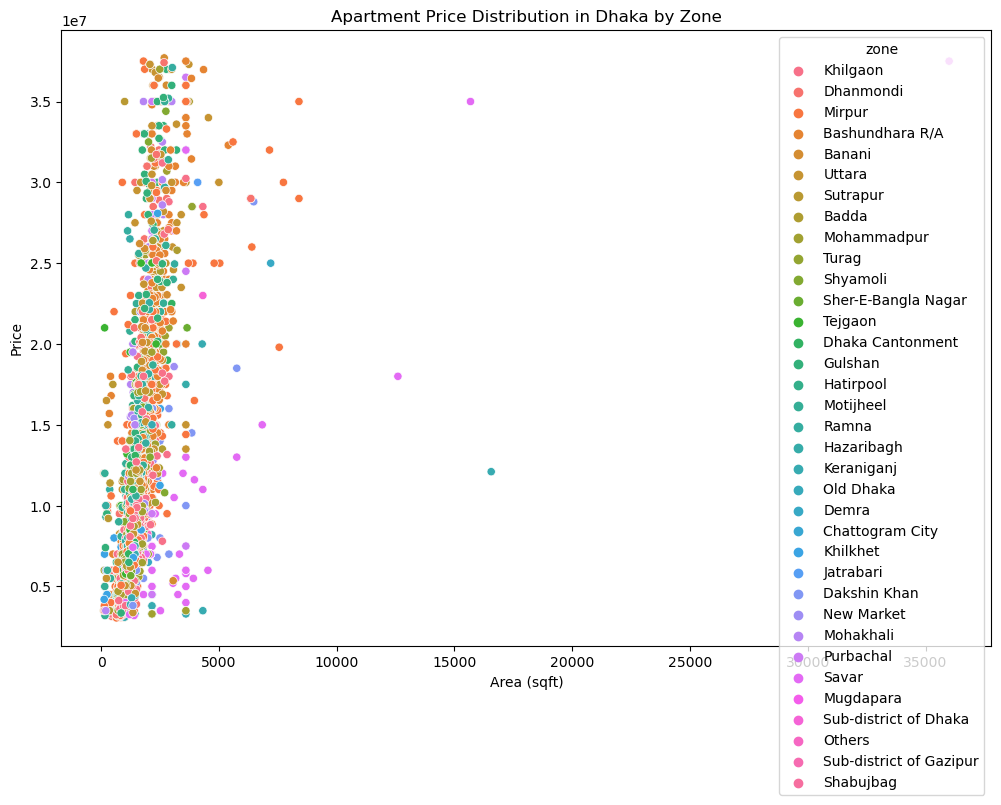

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for apartments in Dhaka
dhaka_apartments = sale[sale['city'] == 'Dhaka']

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dhaka_apartments, x='area', y='price', hue='zone')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Apartment Price Distribution in Dhaka by Zone')
plt.show()

In [30]:
df4.corr()

C:\Users\Jamil\AppData\Local\Temp\ipykernel_2832\3006967730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,pricePerSqft
area,1.000000,0.173613,0.236863,0.020743,-0.017537,0.025293,0.005144,0.049218,-0.033481,-0.016926,-0.016638,0.064676,0.006174,-0.150028
building_type,0.173613,1.000000,0.647093,-0.411158,-0.627070,-0.037049,-0.008278,0.065443,0.072019,0.130141,0.066992,-0.029249,0.090840,0.137540
building_nature,0.236863,0.647093,1.000000,-0.395990,-0.649058,-0.211845,-0.012217,0.035778,0.035167,0.093008,0.027903,-0.037827,0.041147,-0.035925
num_bath_rooms,0.020743,-0.411158,-0.395990,1.000000,0.497137,-0.054228,-0.014680,-0.193034,-0.328033,-0.100816,-0.288140,0.128580,-0.261723,-0.128383
num_bed_rooms,-0.017537,-0.627070,-0.649058,0.497137,1.000000,0.192969,0.018965,0.009405,-0.010771,-0.065695,0.002455,0.053144,-0.001452,0.013824
price,0.025293,-0.037049,-0.211845,-0.054228,0.192969,1.000000,0.088404,0.245945,0.310617,0.076754,0.330486,-0.058693,0.236889,0.662185
relaxation_amenity_count,0.005144,-0.008278,-0.012217,-0.014680,0.018965,0.088404,1.000000,0.101724,0.072007,0.420613,0.131712,0.003847,0.159466,0.051045
security_amenity_count,0.049218,0.065443,0.035778,-0.193034,0.009405,0.245945,0.101724,1.000000,0.592422,0.228181,0.599462,0.301065,0.717740,0.221023
maintenance_or_cleaning_amenity_count,-0.033481,0.072019,0.035167,-0.328033,-0.010771,0.310617,0.072007,0.592422,1.000000,0.225035,0.728156,-0.078918,0.595321,0.309213
social_amenity_count,-0.016926,0.130141,0.093008,-0.100816,-0.065695,0.076754,0.420613,0.228181,0.225035,1.000000,0.254672,-0.013533,0.245263,0.226257


C:\Users\Jamil\AppData\Local\Temp\ipykernel_2832\13821312.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot=True, vmin=-1, vmax=1, center=0)


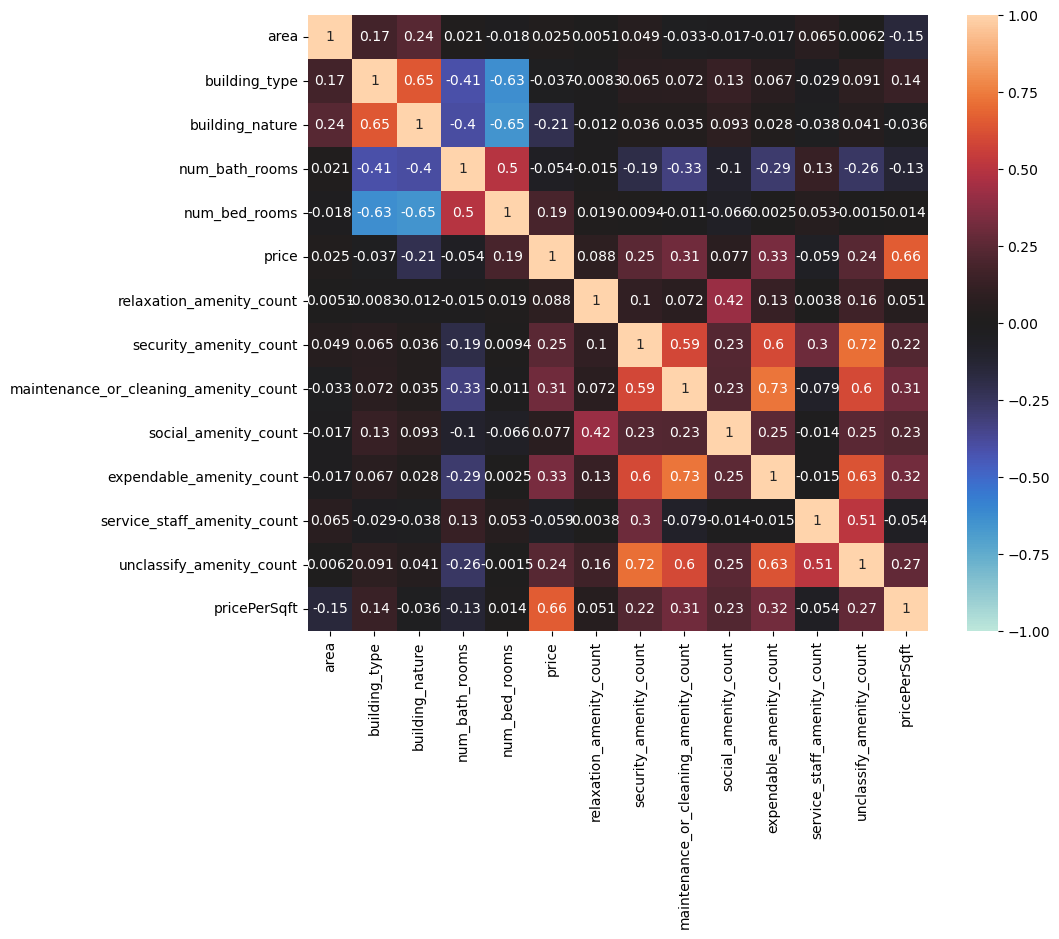

In [31]:
plt.figure(figsize=[10,8])
sns.heatmap(df4.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

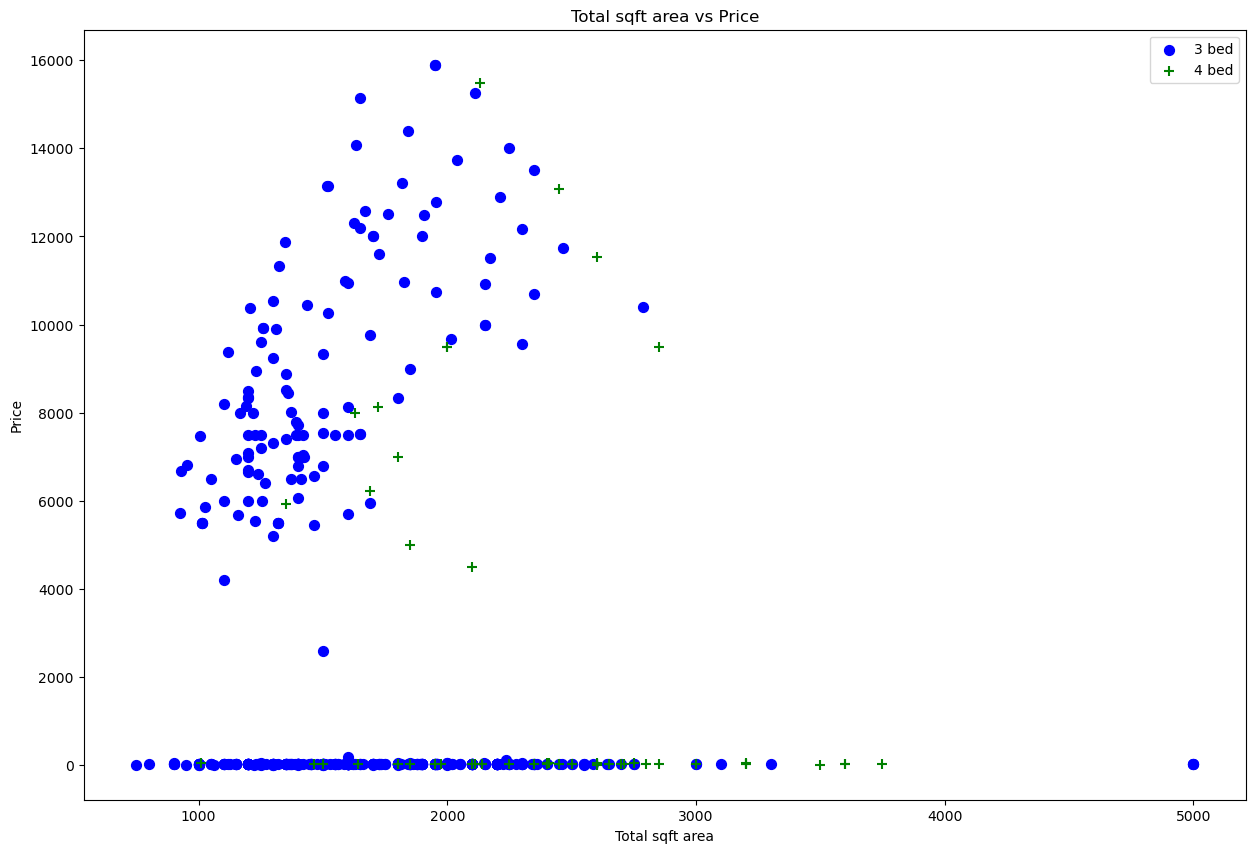

In [32]:
import matplotlib.pyplot as plt

def plot_scatter(df, zone):
    bed3 = df[(df.zone == zone) & (df.num_bed_rooms == 3)]
    bed4 = df[(df.zone == zone) & (df.num_bed_rooms == 4)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bed3.area, bed3.pricePerSqft, color='blue', label='3 bed', s=50)
    plt.scatter(bed4.area, bed4.pricePerSqft, marker='+', color='green', label='4 bed', s=50)
    plt.xlabel('Total sqft area')
    plt.ylabel('Price')
    plt.title('Total sqft area vs Price')
    plt.legend()
    plt.show()

plot_scatter(df4, "Dhanmondi")

In [33]:
def remove_outlires(df):
   exclude_indices=np.array([])
   for zone, zone_df in df.groupby('zone'):
     bed_stats={}
     for num_bed_rooms, bed_df in zone_df.groupby('num_bed_rooms'):
        bed_stats[num_bed_rooms]={
            'mean':np.mean(bed_df.pricePerSqft),
            'std':np.std(bed_df.pricePerSqft),
            'count': bed_df.shape[0]

        }
     for num_bed_rooms, bed_df in zone_df.groupby('num_bed_rooms'):
        stats= bed_stats.get(num_bed_rooms-1)
        if stats and stats['count']>5:
          exclude_indices=np.append(exclude_indices, bed_df[bed_df.pricePerSqft<(stats['mean'])].index.values)
          return df.drop(exclude_indices, axis='index')
df5=remove_outlires(df4)
df5.shape

(29106, 17)

In [34]:
df5[df5.area/df5.num_bed_rooms < 300].head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,zone,pricePerSqft
14,750.0,0,0,2.0,3.0,4900000.0,Sale,Dhaka,0,0,2,0,4,0,4,Mirpur,6533.333333
78,730.0,0,0,0.0,3.0,5000000.0,Sale,Dhaka,0,2,2,0,1,0,3,Mirpur,6849.315068
247,850.0,0,0,2.0,3.0,5000000.0,Sale,Dhaka,0,0,2,0,1,0,3,Badda,5882.352941
318,850.0,0,0,2.0,3.0,5500000.0,Sale,Dhaka,0,0,2,0,3,0,3,Mirpur,6470.588235
378,250.0,0,0,1.0,1.0,3400000.0,Sale,Dhaka,0,1,2,0,2,0,3,Bashundhara R/A,13600.000000


In [35]:
df5.shape


(29106, 17)

In [36]:
df6=df5[~(df5.area/df5.num_bed_rooms < 300)]
df6.shape

(28646, 17)

In [37]:
df6.pricePerSqft.describe()

count     28646.000000
mean       2788.688425
std        4862.756807
min           1.000000
25%          20.833333
50%          60.000000
75%        5225.653600
max      140000.000000
Name: pricePerSqft, dtype: float64

In [38]:
def priceOutliers(df):
  df_out= pd.DataFrame()
  for key, subdf in df.groupby('zone'):
    m= np.mean(subdf.pricePerSqft)
    st = np.std(subdf.pricePerSqft)
    reduceDf = subdf[(subdf.pricePerSqft>(m-st))&(subdf.pricePerSqft<=(m+st))]
    df_out = pd.concat([df_out, reduceDf], ignore_index=True)
  return df_out
df7=priceOutliers(df6)
df7.shape

(22618, 17)

In [39]:
df7.pricePerSqft.describe()

count    22618.000000
mean      1872.996406
std       2651.292388
min          1.000000
25%         21.428571
50%         50.175439
75%       4500.000000
max      14015.518914
Name: pricePerSqft, dtype: float64

In [40]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22618 entries, 0 to 22617
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   22618 non-null  float64
 1   building_type                          22618 non-null  int32  
 2   building_nature                        22618 non-null  int32  
 3   num_bath_rooms                         22618 non-null  float64
 4   num_bed_rooms                          22618 non-null  float64
 5   price                                  22618 non-null  float64
 6   purpose                                22618 non-null  object 
 7   city                                   22618 non-null  object 
 8   relaxation_amenity_count               22618 non-null  int64  
 9   security_amenity_count                 22618 non-null  int64  
 10  maintenance_or_cleaning_amenity_count  22618 non-null  int64  
 11  so

In [41]:
from sklearn.preprocessing import LabelEncoder
df7 = df7.reindex(df.index)
label_encoder = LabelEncoder()
df7['city_encoded'] = label_encoder.fit_transform(df['city'])
df7['zone_encoded'] = label_encoder.fit_transform(df['zone'])

In [42]:
df7 = df7.drop(['city', 'zone','pricePerSqft'], axis=1)

In [43]:
nan_rows = len(df7[df7['purpose'].isnull()])
print(nan_rows)

9959


In [44]:
df7.dropna(inplace=True)

In [45]:
df7['purpose'].replace('Sale','0', inplace=True)
df7['purpose'].replace('Rent','1', inplace=True)
df7['purpose']=df7.purpose.astype(int)

In [46]:
df7.T

,0,1,2,3,4,5,6,7,8,9,...,22608,22609,22610,22611,22612,22613,22614,22615,22616,22617
area,1075.0,1402.0,1100.0,1342.0,1100.0,925.0,900.0,900.0,1050.0,1050.0,...,1500.0,2750.0,20770.0,1650.0,6500.0,2450.0,2000.0,1400.0,900.0,350.0
building_type,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
building_nature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_bath_rooms,3.0,2.0,3.0,3.0,3.0,0.0,2.0,2.0,2.0,0.0,...,3.0,0.0,0.0,4.0,6.0,1.0,5.0,3.0,2.0,1.0
num_bed_rooms,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,0.0,0.0,3.0,6.0,1.0,5.0,3.0,1.0,1.0
price,5700000.0,7500000.0,5300000.0,7200000.0,5300000.0,5200000.0,4300000.0,4000000.0,5300000.0,5300000.0,...,22000.0,260000.0,520000.0,26000.0,200000.0,70000.0,45000.0,23000.0,550000.0,550000.0
purpose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
relaxation_amenity_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
security_amenity_count,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
maintenance_or_cleaning_amenity_count,0.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Define X and Y

In [48]:
X= df7.drop(['price'],axis=1).values
y= df7['price'].values

In [49]:
#split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
print(X.shape,X_train.shape,X_test.shape)

(22412, 15) (17929, 15) (4483, 15)


In [52]:
#Train the model


In [53]:
#Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [55]:
forecast = ml.predict(X_test)
print(forecast)

[7375783.05489965   78426.58120433 7609140.80612306 ... 8616455.89036616
 -293915.50820623  616577.06027227]


In [56]:
trainForecast=ml.predict(X_train)
print(trainForecast)

[-5.39102410e+03 -3.28938213e+05  7.41573029e+06 ... -7.46762509e+05
 -1.46091793e+05  1.69956296e+05]


In [57]:
ml.predict([[1075.0,0,0,3,3,0,0,0,0,0,0,0,0,9,13]])

array([7379899.61627748])

In [58]:
#Performance Matrix

In [59]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,forecast)
print(r1)

0.7280291498432672


In [60]:
#KNN Regressor Algorithm

In [61]:
from sklearn.neighbors import KNeighborsRegressor
KNNml=KNeighborsRegressor(n_neighbors=5)
KNNml.fit(X_train,y_train)

KNeighborsRegressor()

In [62]:
KNNforecast = KNNml.predict(X_test)
print(KNNforecast)

[5040000.  113200. 7486400. ... 6320760. 4380000. 5816000.]


In [63]:
KNNml.predict([[1075.0,0,0,3,3,0,0,0,0,0,0,0,0,9,13]])

array([5189700.])

In [64]:
#Performance Matrix

In [65]:
from sklearn.metrics import r2_score
r4=r2_score(y_test,KNNforecast)
print(r4)

0.3296462690006098


In [66]:
#Gradient Boosting Regressor

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
Boostml=GradientBoostingRegressor()
Boostml.fit(X_train,y_train)

GradientBoostingRegressor()

In [68]:
Boostforecast = Boostml.predict(X_test)
print(Boostforecast)

[4943227.01805176  120950.82188939 7810162.91706322 ... 9595119.74402714
   63432.77032477 -409180.05897476]


In [69]:
Boostml.predict([[1075.0,0,0,3,3,0,0,0,0,0,0,0,0,9,13]])

array([5085714.71545555])

In [70]:
# Performance Metrix GBR

In [71]:
from sklearn.metrics import r2_score
r5=r2_score(y_test,Boostforecast)
print(r5)

0.9043182735454103


In [72]:
# Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
Fml=RandomForestRegressor(n_estimators=100)
Fml.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
Fforecast = Fml.predict(X_test)
print(Fforecast)

[4096290.          138381.2        6625480.         ... 8927790.
   19505.           30933.33333333]


In [75]:
trainFforecast = Fml.predict(X_train)
print(trainFforecast)

[  24340.           25030.         3358130.         ...   16413.75
   18710.09920635   47608.33333333]


In [76]:
Fml.predict([[1075.0,0,0,3,3,0,0,0,0,0,0,0,0,9,13]])

array([5467994.91])

In [77]:
# Performance Matrix

In [78]:
from sklearn.metrics import r2_score
r6=r2_score(y_test,Fforecast)
print(r6)

0.914973951721117


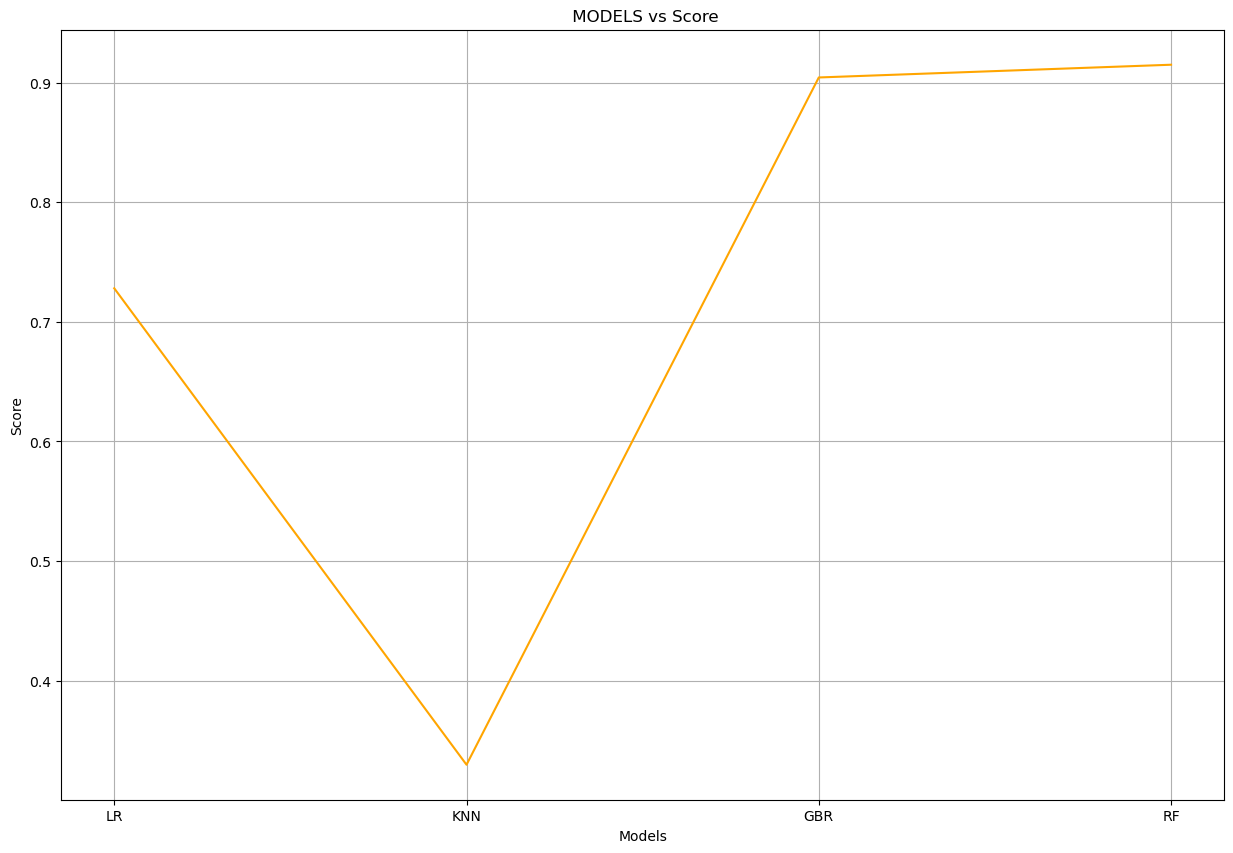

In [79]:
score=r1,r4,r5,r6
model=['LR','KNN','GBR','RF']
plt.xlabel('Models')
plt.ylabel('Score')

plt.title(' MODELS vs Score')
plt.plot(model,score, color='orange')
plt.grid()

In [80]:
# import joblib 
# joblib.dump(Fml, "Price_Prediction_Model.pkl")